In [227]:
from graphviz import Graph, Source
class grapth:
    def __init__(self):
        self.nodes = set([])
        self.edges = {
            
        }
        self.edge_cost = {
            
        }
        
    def add_node(self, node):
        self.nodes.update(node)
    
    def add_edge(self, source, target, cost):
        if(source not in self.edges.keys()):
            self.edges[source] = []
        elif(target not in self.edges.keys()):
            self.edges[target] = []
        self.edges[source].append(target)
        self.edge_cost["{}->{}".format(source, target)] = cost
        
    def clear_edge(self):
        self.edges = {
            
        }
        self.edge_cost = {
            
        }
        
    def draw_grapth(self, path=set([])):
        dot = Graph()
        for node in self.nodes:
            if(node in path):
                dot.node(node, color="red")
            else:
                dot.node(node)
            
        for source, target in self.edges.items():
            for node in target:
                dot.edge(source, node, weight=str(self.edge_cost["{}->{}".format(source, node)]), label=str(self.edge_cost["{}->{}".format(source, node)]))
        return dot

In [228]:
working_grapth = grapth()
working_grapth.add_node("a")
working_grapth.add_node("b")
working_grapth.add_node("c")
working_grapth.add_node("d")
working_grapth.add_node("e")
working_grapth.add_node("f")
working_grapth.add_node("g")
working_grapth.add_node("h")


In [247]:
working_grapth.clear_edge()
working_grapth.add_edge("a", "b", 2)
working_grapth.add_edge("b", "c", 3)
working_grapth.add_edge("c", "d", 2)


working_grapth.add_edge("f", "h", 1)
working_grapth.add_edge("h", "f", 1)
working_grapth.add_edge("a", "h", 6)


working_grapth.add_edge("a", "e", 1)
working_grapth.add_edge("e", "f", 10)
working_grapth.add_edge("f", "g", 2)
working_grapth.add_edge("g", "d", 1.5)

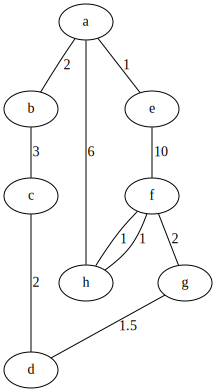

In [248]:
Source(working_grapth.draw_grapth())

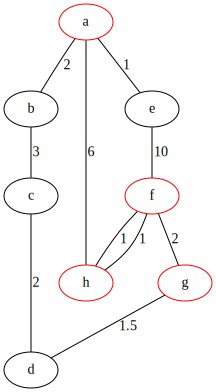

In [255]:
import queue

def a_star(grapth, start, goal):
    visited_nodes = set()
    node_queue = queue.PriorityQueue()
    node_score = {
        
    }

    node_queue.put((0, start))

    path = {}
    node_score[start] = 0
    
    
    while not node_queue.empty():
        current = node_queue.get()[1]
        
        visited_nodes.add(current)
        
        if(current == goal):
            visited_nodes = set([current])
            while current in path.keys():
                current = path[current]
                visited_nodes.update(current)
            return visited_nodes
        
        edges = grapth.edges[current]
        for edge_node in edges:
            if(edge_node in visited_nodes):     
                continue

            cost = node_score[current] + grapth.edge_cost["{}->{}".format(current, edge_node)]
            if(edge_node not in node_score.keys() or cost <= node_score[edge_node]):
                node_score[edge_node] = cost
                node_queue.put((cost, edge_node))
                path[edge_node] = current                
    raise Exception("Path not found")

z = a_star(working_grapth, "a", "g")
Source(working_grapth.draw_grapth(z))